In [2]:
!pip install numpy seaborn matplotlib tqdm tensorflow scikit-learn 

^C


Defaulting to user installation because normal site-packages is not writeable


In [1]:
"""
    This file used to load the entire dataset, perform the require preprocessing and split the data into train, validation and test sets
"""
import os
import pickle
import numpy as np
import seaborn as sns
from tqdm import tqdm
import tensorflow.keras as K
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import StratifiedShuffleSplit
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import load_img

  0%|          | 0/6 [00:00<?, ?it/s]

100%|██████████| 6/6 [00:06<00:00,  1.07s/it]


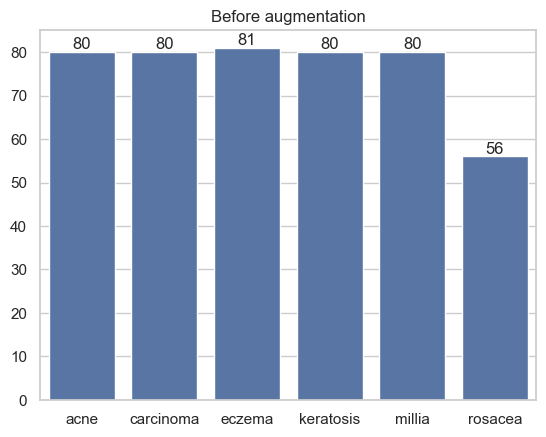

In [2]:
img_path = os.listdir('dataset_dir')

features = []
labels = []
dict = {'acne': 0, 'carcinoma': 1, 'eczema': 2, 'keratosis': 3, 'mila': 4, 'rosacea': 5}
for i in tqdm(dict.keys()):
    fname = './dataset_dir'+'/'+i+'/'
    images = os.listdir(fname)
    for img_path in images:
        img = image.load_img(fname+img_path, target_size=(299, 299))
        x = img_to_array(img)
        x = K.applications.xception.preprocess_input(x)
        features.append(x)
        y = i.split(".")[0]
        labels.append(dict[i])
features = np.array(features)
labels = np.array(labels)

lbl, count = np.unique(labels, return_counts=True)                                            # plot a bar plot to show the quantity of images in each class
temp = {0: 'acne', 1: 'carcinoma', 2: 'eczema', 3: 'keratosis', 4: 'millia', 5: 'rosacea'}
count_lbl = {}
for i in range(len(lbl)):
    count_lbl[temp[lbl[i]]] = count[i]
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=list(count_lbl.keys()), y=list(count_lbl.values()))
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Before augmentation')
plt.show()

indices = np.random.permutation(len(features))
features = features[indices]
labels = labels[indices]

In [3]:
x_train, y_train, rx_test, ry_test, x_val, y_val, x_test, y_test = [], [], [], [], [], [], [], []

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)       # split the test set
for train_index, r_index in split.split(features, labels):
    x_train, rx_test = features[train_index], features[r_index]
    y_train, ry_test = labels[train_index], labels[r_index]

split = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=0)      # split the training data into training and validation sets
for val_index, test_index in split.split(rx_test, ry_test):
    x_val, x_test = rx_test[val_index], rx_test[test_index]
    y_val, y_test = ry_test[val_index], ry_test[test_index]

In [6]:
f = open("dir/x_train.bin", "wb")
pickle.dump(x_train, f)
f.close()
f = open("dir/y_train.bin", "wb")
pickle.dump(y_train, f)
f.close()
f = open("dir/x_val.bin", "wb")
pickle.dump(x_val, f)
f.close()
f = open("dir/y_val.bin", "wb")
pickle.dump(y_val, f)
f.close()
f = open("dir/x_test.bin", "wb")
pickle.dump(x_test, f)
f.close()
f = open("dir/y_test.bin", "wb")
pickle.dump(y_test, f)
f.close()
